Firstly, we get the data from yahoo finance and compute the technical indicators

In [1]:
### Extracting data from yahoo finance. It should be easily scalable. We can just add tickers to expand the model
import yfinance as yf
from tqdm import tqdm
import numpy as np

def fetch_data_with_fundamentals(tickers, start_date, end_date):
    """
    Fetch daily stock data along with PE ratio and market cap for given tickers from Yahoo Finance.

    Parameters:
    - tickers (list): List of stock ticker symbols.
    - start_date (str): Start date in format 'YYYY-MM-DD'.
    - end_date (str): End date in format 'YYYY-MM-DD'.

    Returns:
    - data (dict): Dictionary with ticker symbols as keys and corresponding data as values.
    """
    data = {}
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date)
            
            # Fetch PE ratio and market cap
            ticker_obj = yf.Ticker(ticker)
            pe_ratio = ticker_obj.info.get('trailingPE', None)
            market_cap = ticker_obj.info.get('marketCap', None)
            
            # Only if both stock_data, PE ratio, and market cap are available, store them in the dictionary
            if stock_data is not None and pe_ratio is not None and market_cap is not None:
                stock_data['PE_Ratio'] = pe_ratio
                stock_data['Market_Cap'] = market_cap
                data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
            continue
    return data


# Pick the data we want to use
tickers = ["META", "MMM", "AOS", "ABT", "AEP", "AXP", "AIG", "AMT", "AWK", "AMP", "AME", "AMGN", "APH", "ADI", "ANSS", "AON", "APA", "AAPL", "AMAT", "APTV", "ACGL", "ANET", "AJG", "AIZ", "T", "ATO", "ADSK", "AZO", "AVB", "AVY", "AXON", "BKR", "BALL", "BAC", "BBWI", "BAX", "BDX", "WRB", "BRK.B", "ZTS","CTSH", "CL", "CMCSA", "CMA", "CAG", "COP", "ED", "STZ", "CEG", "COO", "CPRT", "GLW", "CTVA", 
"CSGP", "COST", "CTRA", "CCI", "CSX", "CMI", "CVS", "DHI", "DHR", "DRI", "DVA", "DE", "DAL"]
start_date = '2013-01-01'
end_date = '2023-01-01'
stock_data = fetch_data_with_fundamentals(tickers, start_date, end_date)

# Print the data for one of the stocks to check
print(stock_data['META'].tail())


### Next, we calculate some technical indicators

import pandas as pd

def compute_technical_indicators(data):
    """
    Compute 20-day moving average and RSI for the stock data.

    Parameters:
    - data (DataFrame): Stock data.

    Returns:
    - data (DataFrame): Stock data with added MA20 and RSI columns.
    """
    # 20-day Moving Average
    data['MA20'] = data['Close'].rolling(window=20).mean()
    
    # Compute Relative Strength Index (RSI)
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    return data

# Compute technical indicators for each stock
for ticker, df in stock_data.items():
    stock_data[ticker] = compute_technical_indicators(df)

# Print the data for one of the stocks to check
print(stock_data['META'].tail())



def compute_lagged_returns(data, lag_days=5):
    """
    Compute lagged returns for the stock data.

    Parameters:
    - data (DataFrame): Stock data with Close prices.
    - lag_days (int): Number of lagged days to compute.

    Returns:
    - data (DataFrame): Stock data with added lagged return columns.
    """
    # Compute daily returns
    data['Daily_Return'] = data['Close'].pct_change()
    
    # Create lagged return columns
    for i in range(1, lag_days + 1):
        data[f'Lagged_Return_{i}'] = data['Daily_Return'].shift(i)
    
    return data

# Compute lagged returns for each stock
for ticker, df in stock_data.items():
    stock_data[ticker] = compute_lagged_returns(df)


def compute_bollinger_bands(data):
    """
    Compute Bollinger Bands for stock data.
    
    Parameters:
    - data (DataFrame): Stock data with `Close` column.
    
    Returns:
    - DataFrame with added Bollinger Bands columns.
    """
    # Calculate rolling mean and standard deviation
    rolling_mean = data['Close'].rolling(window=20).mean()
    rolling_std = data['Close'].rolling(window=20).std()
    
    # Calculate Bollinger Bands
    data['Upper_Bollinger_Band'] = rolling_mean + (rolling_std * 2)
    data['Lower_Bollinger_Band'] = rolling_mean - (rolling_std * 2)
    
    return data

def compute_macd(data):
    """
    Compute MACD and Signal line for stock data.
    
    Parameters:
    - data (DataFrame): Stock data with `Close` column.
    
    Returns:
    - DataFrame with added MACD and Signal line columns.
    """
    # Calculate 12-day EMA and 26-day EMA
    data['12_day_EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['26_day_EMA'] = data['Close'].ewm(span=26, adjust=False).mean()
    
    # Calculate MACD
    data['MACD'] = data['12_day_EMA'] - data['26_day_EMA']
    
    # Calculate Signal line
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
    
    return data


for ticker, df in stock_data.items():
    df = compute_bollinger_bands(df)
    df = compute_macd(df)
    stock_data[ticker] = df


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

Now we split the data to prepare it for the model

In [2]:

def split_data(data, train_fraction=0.9):
    """
    Split time series data into training and testing sets.

    Parameters:
    - data (DataFrame): Stock data.
    - train_fraction (float): Fraction of data to be used for training.

    Returns:
    - train (DataFrame): Training data.
    - test (DataFrame): Testing data.
    """
    train_size = int(len(data) * train_fraction)
    train = data[:train_size]
    test = data[train_size:]
    return train, test

# Split data for each stock in the stock_data dictionary
train_data = {}
test_data = {}

for ticker, df in stock_data.items():
    train, test = split_data(df)
    train_data[ticker] = train
    test_data[ticker] = test

# Print the shapes of the training and testing data for META to check
print(f"META - Training data shape: {train_data['META'].shape}")
print(f"META - Testing data shape: {test_data['META'].shape}")



META - Training data shape: (2266, 22)
META - Testing data shape: (252, 22)


Now we define and run the random forest model

In [3]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Create the target column for each stock and concatenate to form a combined dataset
all_train_data = pd.concat([df.assign(Ticker=ticker) for ticker, df in train_data.items()])
all_train_data['Target'] = all_train_data.groupby('Ticker')['Daily_Return'].shift(-1)
all_train_data.dropna(inplace=True)  # Drop rows with NaN targets

# Define features and target
features = ['MA20', 'RSI', 'PE_Ratio', 'Market_Cap', 
            'Upper_Bollinger_Band', 'Lower_Bollinger_Band', 
            'MACD', 'Signal_Line'] + [f'Lagged_Return_{i}' for i in range(1, 3)]

target = 'Target'

# Split combined dataset into X (features) and y (target)
X_train = all_train_data[features]
y_train = all_train_data[target]

# Train a Random Forest model on the dataset. We use the gridsearch to tune the hyperparameters
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest model
rf = RandomForestRegressor()


# Use RandomizedSearchCV with 10 iterations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=100)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters on the full training set
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)


# Predict on the combined training set to check performance
train_predictions = model.predict(X_train)
mse = mean_squared_error(y_train, train_predictions)
print(f"Training MSE for all stocks: {mse}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}
Training MSE for all stocks: 0.0003268169285414518


We compute the sharp ratios

In [4]:

def calculate_sharpe_ratio(returns, risk_free_rate=0.0003):
    """
    Calculate the Sharpe ratio.

    Parameters:
    - returns (Series): Daily returns.
    - risk_free_rate (float, optional): Daily risk-free rate. Default is 0.0003.

    Returns:
    - sharpe_ratio (float): Sharpe ratio of the given returns.
    """
    avg_daily_return = returns.mean()
    std_dev_return = returns.std()
    sharpe_ratio = (avg_daily_return - risk_free_rate) / std_dev_return
    return sharpe_ratio


We perform the backtest using the model. We short the 20 worst stocks and buy the 20 best stocks

In [5]:
def directional_accuracy(predictions, actual_values):
    """
    Computes the percentage of times the sign of the predicted values 
    matches the sign of the actual values.

    Parameters:
    - predictions (array-like): Predicted values.
    - actual_values (array-like): True target values.

    Returns:
    - float: Percentage of correct directional predictions.
    """
    predicted_signs = np.sign(predictions)
    actual_signs = np.sign(actual_values)
    
    matches = (predicted_signs == actual_signs).sum()
    
    return (matches / len(actual_values)) * 100


def backtest_long_short_strategy(test_data_dict, model, features, n=20):
    """
    Backtest the trained model on the testing data, going long on top 'n' stocks with highest predicted returns
    and short on bottom 'n' stocks with lowest predicted returns.

    Parameters:
    - test_data_dict (dict): Dictionary with tickers as keys and corresponding testing data as values.
    - model (Regressor): Trained regression model.
    - features (list): List of feature columns to use in prediction.
    - n (int): Number of stocks to long and short each day.

    Returns:
    - results (DataFrame): DataFrame with daily returns, strategy returns, and cumulative returns.
    """
    
    # Create a DataFrame to store daily returns for all stocks
    all_daily_returns = pd.DataFrame(index=test_data_dict[list(test_data_dict.keys())[0]].index)
    all_predicted_returns = pd.DataFrame(index=test_data_dict[list(test_data_dict.keys())[0]].index)
    
    # Predict returns for all stocks
    for ticker, data in test_data_dict.items():
        # Check if data[features] is empty
        if data[features].empty:
            print(f"Data for {ticker} is empty. Skipping...")
            continue
        
        data['Predicted_Return'] = model.predict(data[features])
        all_daily_returns[ticker] = data['Daily_Return']
        all_predicted_returns[ticker] = data['Predicted_Return']

    # After exiting the loop, compute overall directional accuracy
    overall_predicted_returns = all_predicted_returns.values.flatten()
    overall_actual_returns = all_daily_returns.values.flatten()
    dir_accuracy = directional_accuracy(overall_predicted_returns, overall_actual_returns)
    print(f"Overall Directional Accuracy: {dir_accuracy:.2f}%")

    # Determine top 'n' stocks to long and bottom 'n' stocks to short each day
    long_stocks = all_predicted_returns.rank(axis=1, ascending=False) <= n
    short_stocks = all_predicted_returns.rank(axis=1, ascending=True) <= n

    # Calculate daily strategy return 
    daily_long_return = (all_daily_returns * long_stocks).sum(axis=1) / long_stocks.sum(axis=1)
    daily_short_return = (all_daily_returns * short_stocks).sum(axis=1) / short_stocks.sum(axis=1)
    daily_strategy_return = daily_long_return - daily_short_return

    # Compute cumulative returns
    cumulative_strategy_return = (1 + daily_strategy_return).cumprod() - 1
    cumulative_actual_return = (1 + all_daily_returns.mean(axis=1)).cumprod() - 1

    results = pd.DataFrame({
        'Daily_Return': all_daily_returns.mean(axis=1),
        'Strategy_Return': daily_strategy_return,
        'Cumulative_Strategy_Return': cumulative_strategy_return,
        'Cumulative_Actual_Return': cumulative_actual_return
    })
    
    # Assuming the calculate_sharpe_ratio function is defined elsewhere in your code
    results['Strategy_Sharpe_Ratio'] = calculate_sharpe_ratio(results['Strategy_Return'])
    results['Actual_Sharpe_Ratio'] = calculate_sharpe_ratio(results['Daily_Return'])

    # After computing the overall directional accuracy
    dir_accuracy = directional_accuracy(overall_predicted_returns, overall_actual_returns)

    # Add the directional accuracy to the results DataFrame
    results['Overall_Directional_Accuracy'] = dir_accuracy

    print(f"Overall Directional Accuracy: {results['Overall_Directional_Accuracy'].iloc[0]:.2f}%")

    return results




We plot the cummulative returns of the two strategies

C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_14112/2750384032.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Return'] = model.predict(data[features])
C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_14112/2750384032.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Return'] = model.predict(data[features])
C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_14112/2750384032.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Overall Directional Accuracy: 47.70%
Overall Directional Accuracy: 47.70%


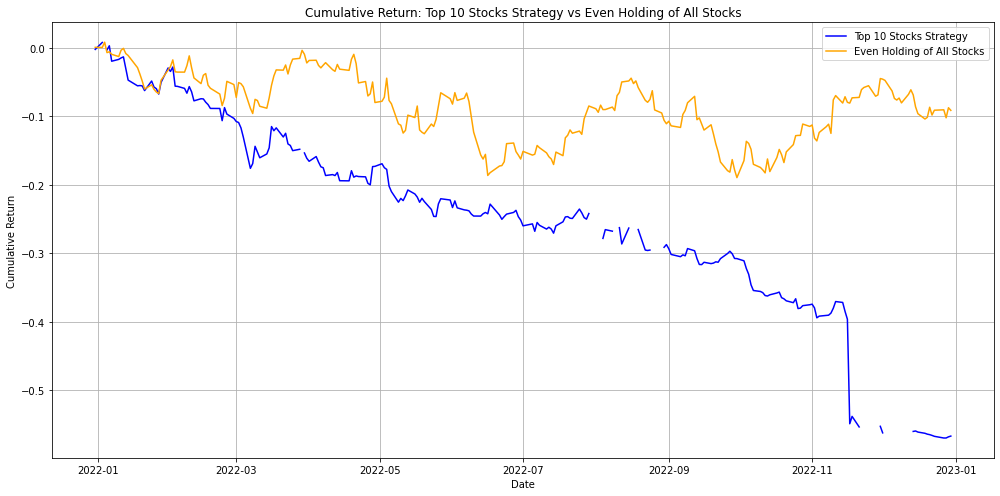

Strategy Sharpe Ratio: -0.1813
Actual Sharpe Ratio: -0.0400


In [8]:

import matplotlib.pyplot as plt

def plot_strategy_vs_holding(results_df):
    """
    Plot the cumulative return of the model-based strategy vs. holding even amount of stocks.

    Parameters:
    - results_df (DataFrame): DataFrame containing 'Cumulative_Strategy_Return' and 'Cumulative_Actual_Return' columns.
    """
    
    plt.figure(figsize=(14, 7))
    
    # Plot the cumulative returns
    plt.plot(results_df['Cumulative_Strategy_Return'], label='Top 10 Stocks Strategy', color='blue')
    plt.plot(results_df['Cumulative_Actual_Return'], label='Even Holding of All Stocks', color='orange')
    
    plt.title('Cumulative Return: Top 10 Stocks Strategy vs Even Holding of All Stocks')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()
    
    # Print Sharpe Ratios
    print(f"Strategy Sharpe Ratio: {results_df['Strategy_Sharpe_Ratio'].iloc[0]:.4f}")
    print(f"Actual Sharpe Ratio: {results_df['Actual_Sharpe_Ratio'].iloc[0]:.4f}")

results = backtest_long_short_strategy(test_data, model, features, n=20)

plot_strategy_vs_holding(results)


Now we go deeper into the model. We check what features are most important for the model. 

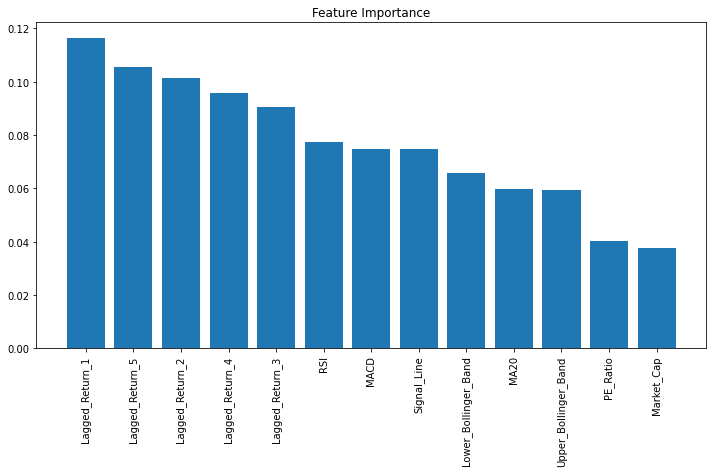

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting features from the provided code
features = ['MA20', 'RSI', 'PE_Ratio', 'Market_Cap', 
            'Upper_Bollinger_Band', 'Lower_Bollinger_Band', 
            'MACD', 'Signal_Line'] + [f'Lagged_Return_{i}' for i in range(1, 6)]

# Assuming the model variable from the code snippet is the trained Random Forest model
# Here's the function to plot the feature importance:

def plot_feature_importance(model, feature_names):
    """
    Plots the feature importances of a trained model.

    Parameters:
    - model: The trained model.
    - feature_names (list): Names of the features used to train the model.
    """
    # Get feature importances
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [feature_names[i] for i in indices]

    # Create plot
    plt.figure(figsize=(12, 6))

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(len(importances)), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(len(importances)), names, rotation=90)

    # Show plot
    plt.show()

# For demonstration purposes, I'll use the plot function
# Please note: this will not execute correctly here since the model isn't actually trained in this environment.
# You'll need to run this function in your original notebook where the model is trained.
# plot_feature_importance(model, features)  # Uncomment this in your notebook

# Displaying the function for the user to use in their notebook
plot_feature_importance


plot_feature_importance(model, features)


Now, we use the residuals from the model

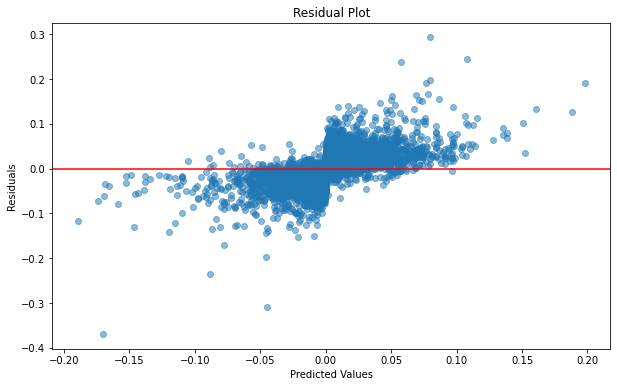

In [ ]:
import matplotlib.pyplot as plt

def plot_residuals(model, X, y):
    """
    Plots residuals of a model's predictions on given data.

    Parameters:
    - model: The trained model.
    - X (DataFrame): Features data.
    - y (Series): True target values.
    """
    # Get model predictions
    predictions = model.predict(X)
    
    # Calculate residuals
    residuals = y - predictions

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0 for reference
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()


# Example usage (assuming X_train contains your features and y_train contains the true values)
plot_residuals(model, X_train, y_train)
